### K-최근접 이웃 회귀모델
##### - 분류 : 범주형 데이터를 기준으로 분류하는 방식
##### - 회귀 : 연속형 데이터(숫자)를 예측하는 방식
##### - 회귀는 정해진 범주가 없으며, 임의의 수치값을 출력합니다.
##### 
### K-최근접 이웃 알고리즘은 회귀에도 작동 합니다.
##### - 작동방식
##### - 분류와 유사, 예측하려는 데이터에 가장 가까운 이웃 갯수 선택
##### - 종속변수 target데이터가 연속형데이터를 사용하여 임의 수치값 예측
##### 
### 예측값 결정 방식
##### : 최근접 이웃의 갯수가 정해지면, 이웃한 숫자값들의 "평균"을 계산하여
##### : 평균과 같거나 평균에 가장 근사한 값의 이웃데이터가 예측값으로 결정
#####   (일반 책에서 나오는 개념으로, 실제는 이웃데이터의 평균값이 나온다고 보면 됨)
#####    그래서 임의 결과값이라고 함

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

Text(0, 0.5, 'weigth')

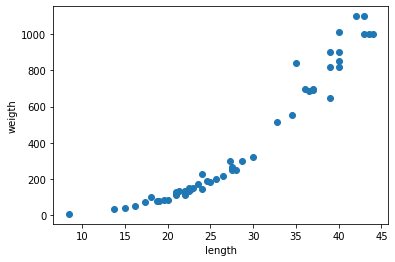

In [3]:
# length(길이) : 특성 데이터(훈련데이터, train_data)
# weight(무게) : 정답 데이터(train_target)
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)

plt.xlabel('length')
plt.ylabel('weigth')


# (해석)
# - 길이가 길수록 무게도 많이 나가는 것으로 보임
# - 길이와 무게가 연관성을 가지고 있는 것으로 보임

# 길이가 길어지면 무게가 커지는 현상 보임
# 길이는 무게와 연광성 있다
# 분포 형태는 선형에 가까우나 조금 라운드짐
# 그러나 선형적 모델 이용해 분석 실시 후
# 향후 다항회귀모델을 통해 선형적 모델과 다항외귀모델을 검증결과 통해 선택하고자 함

### 훈련데이터와 테스트데이터 분류하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
## 훈련데이터 / 테스트데이터 세트 생성
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)


In [6]:
print(train_input)
print("-----------------------")
print(test_input)
print("-----------------------")
print(train_target)
print("-----------------------")
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
-----------------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
-----------------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
-----------------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


### 2차원 데이터로 변환하기

In [7]:
## 차원 확인하기 : numpy 배열 속성에 잇음
# 샘플
test_array = np.array([1,2,3,4])
print(test_array.shape)

# 2행 2열로 만들기
print(test_array.reshape(2,2))

(4,)
[[1 2]
 [3 4]]


In [8]:
train_input = np.column_stack((train_input))
test_input = np.column_stack((test_input))

print(train_input)
print(test_input).re

[[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
  43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
  28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]]
[[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]]


In [9]:
# 1차원 데이터를 특정 행렬의 2차원으로 재생성할 때 사용하는 함수
# 보통 1차원을 2차원으로 만들때는 각행의 값이 차원이 됩니다.
# 즉, 각 행의 값이 배열(리스트) 1개라고 보시면 됩니다.
# 1차원을 2차원으로 만들때는 첫번째 행은 전체 갯수, 두번째는 1이 됩니다.
# 전체 갯수를 모를 때는 -1 값을 사용하면 전체 행의 갯수를 체크합니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape)
print(train_input)
print("-----------------")
print(test_input)

(42, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
-----------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


### k-최근접이웃 회귀 클래스(모델)생성

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
### 클래스(모델) 이름 : KNeighborsRegressor()
knr= KNeighborsRegressor()
knr

KNeighborsRegressor()

In [12]:
### 훈련데이터 학습시키기 : 훈련모델 생성하기
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [13]:
### 훈련모델 평가
# 분류에서는 score의 결과값을 정확도라고 햇다면
# 회귀에서는 결정계수(R^2)라는 용어 사용

### 회귀모델의 학습평가 결과 : 결정계수를 이용
# - 회귀에서는 정확한 숫자를 맞히는 것은 불가능

### 결정게수의 범위
# - 0 ~ 1 사이의 값을 반환 받습니다
# - 1에 가까울 수록 훈련이 잘된 모델이라고 판단하면 됨
# - 보통 0.95이상을 좋다고 판단함.(기준은 아님)

### 결정계수 공식
# 결정계수(R^2) = 1 - ((target - 예측)^2 의 합 / (target - 평균)^2 의 합)
# - 예측값이 target값에 가까울 수록, 분자값이 0에 가까워지며, 1에 가까워짐

knr.score(test_input, test_target)

0.992809406101064

### 오차 확인하기
##### - 일반적으로 계산에 의한 결정계수값을 봐서는 오차가 어느정도인지 모름
##### - 오차 값 확인 필요

In [14]:
### 오차 확인 위해 예측 먼저 선행
test_prediction = knr.predict(test_input)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [15]:
### 타겟값과 예측값 간의 오차를 확인하는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error

In [16]:
### 오차값은 : 테스트데이터에 대한 평균 절대값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

#(해석)
# 예측값이 평균적으로 19g 정도 target 값과 차이가 잇다는 것 의미
# 차이 = 다르다는 의미 아님

19.157142857142862

In [17]:
### 테스트 결정계수
knr.score(test_input, test_target)

0.992809406101064

In [18]:
knr.score(train_input, train_target)

0.9698823289099254

### 과대적합 vs 과소적합
##### - 훈련데이터와 테스트데이터를 각각 평가하여 비교했을 때
##### - 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경수
##### - 2. 과소적합 : 훈련데이터의 평가결과가 낮고, 테스트데이터의 평가가 높은 경수
##### 
### 과소적합이 발생하는 이유
##### - 사용된 전체 데이터의 갯수가 너무 작은 경우에 주로 발생
##### - 데이터가 작으면 테스트데이터가 훈련데이터의 특징을 잘 따르지 못하는 경우 발생

In [19]:
### 과소적합 해소 방법
# - 훈련모델을 복잡하게 만들어서 평가결과를 높일 수 있음

### 모델을 복잡하게 만드는 방법
# - 이웃의 갯수를 작게하면 됨
# - 이웃의 갯수가 작아지면, 이웃의 비교 대상이 조금 더 압축되므로 훈련의 집중도, 정확도가 높아 짐.

### 이웃의 갯수 : 기본 5개 (보통 3,5,7)
# - 복잡도를 높이는 방법은 이웃의 갯수를 줄여나가는 방법

In [28]:
knr5 = KNeighborsRegressor(n_neighbors=5)
knr5.fit(train_input, train_target)
knr5.score(test_input, test_target)

0.992809406101064

In [44]:
knr.n_neighbors=3
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9746459963987609
0.9804899950518966
